In [3]:
import cv2
import dlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [4]:
def detect_face(image):
    # Load the pre-trained HOG face detector from dlib
    face_detector = dlib.get_frontal_face_detector()

    # Detect faces in the image
    faces = face_detector(image, 1)

    if len(faces) > 0:
        # Assuming only one face, you can modify this if there are multiple faces
        x, y, w, h = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()
        bounding_box = (x, y, w, h)
        return bounding_box
    else:
        # If no face is detected, use the entire image as the bounding box
        height, width, _ = image.shape
        bounding_box = (0, 0, width, height)
        return bounding_box

In [9]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving oily_2e46a3c2d47fd1ba91f3_jpg.rf.628f265b1fbeaba725df52458015bcbb.jpg to oily_2e46a3c2d47fd1ba91f3_jpg.rf.628f265b1fbeaba725df52458015bcbb.jpg


Face detected. Bounding box: (232, 247, 44, 44)


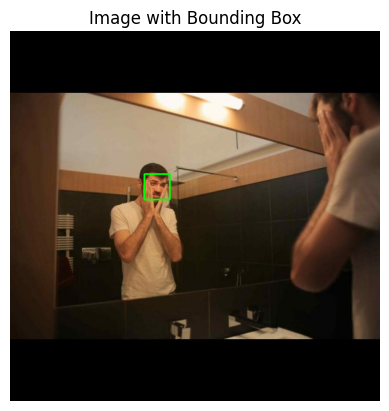

In [10]:
image = cv2.imread(filename)

if image is not None:
    bounding_box = detect_face(image)

    print(f"Face detected. Bounding box: {bounding_box}")

    # Draw the bounding box on the image
    x, y, w, h = bounding_box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with the bounding box using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image with Bounding Box")
    plt.axis("off")
    plt.show()

    # You can then use the bounding box to extract the face or perform further processing
else:
    print("Failed to load the image.")